In [19]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [20]:
data = pd.read_csv('data/day08_digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X,y = data.iloc[:,1:],data.iloc[:,0]


In [22]:
rfc = RandomForestClassifier(n_estimators=100,random_state=100)
X_embedded = SelectFromModel(rfc,threshold=0.005).fit_transform(X,y)
X_embedded

array([[  0,   0,   0, ..., 195, 220, 253],
       [254, 217, 254, ..., 194, 243, 254],
       [254,   8, 254, ...,   0,   0,   0],
       ...,
       [  0,   0, 128, ...,   0,   0,   0],
       [ 27, 253, 253, ..., 153,  48, 242],
       [  0,   0, 209, ...,  85,   0,   0]], dtype=int64)

In [23]:
X_embedded.shape

(42000, 41)

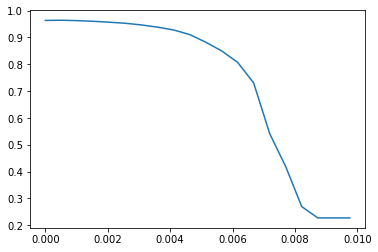

In [24]:
import numpy as np
import matplotlib.pyplot as plt
rfc.fit(X,y).feature_importances_
threshold = np.linspace(0,(rfc.fit(X,y).feature_importances_).max(),20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(rfc,threshold=i).fit_transform(X,y)
    once = cross_val_score(rfc,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [25]:
max(score)

0.9640714285714285

In [26]:
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(n_estimators=100,random_state=100)

selector = RFE(rfc,n_features_to_select=340,step=50).fit(X,y)

In [28]:
selector.support_.sum()

340

In [29]:
selector.ranking_

array([10,  9,  8,  8,  8,  8,  9,  8,  8,  8,  8,  8,  9,  8,  8,  8,  8,
        8,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        7,  7,  6,  7,  7,  7,  6,  7,  7,  6,  7,  7,  7,  9,  7,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  9,  7,  6,  5,  5,  4,  4,
        4,  3,  4,  3,  4,  5,  4,  5,  5,  5,  6,  7,  7,  9,  9, 10, 10,
       10, 10,  8,  9,  7,  6,  5,  4,  3,  3,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  4,  4,  5,  6,  7,  8, 10, 10, 10, 10, 10,  6,  6,  5,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  3,  4,
        5,  6,  7, 10, 10, 10,  9,  7,  6,  5,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  4,  5,  6, 10, 10, 10,
        8,  6,  5,  4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  5,  6,  7, 10, 10,  7,  6,  4,  3,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  6,  8,  8, 10

In [30]:
X_wrapper = selector.transform(X)
score = cross_val_score(rfc,X_wrapper,y,cv=5).mean()

0.9642619047619048

In [ ]:
%%timeit
score = []
for i in range(1,751,50):
    X_wrapper = RFE(rfc,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(rfc,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()